# Logistic Regression


## Upload dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving fetal_health_logistic.csv to fetal_health_logistic.csv
User uploaded file "fetal_health_logistic.csv" with length 141928 bytes


## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading dataset

In [ ]:
ds=pd.read_csv("fetal_health_logistic.csv")
print("Shape of dataset : ",ds.shape)
print("Dataset :-\n",ds.head())

Shape of dataset :  (1950, 22)
Dataset :-
    baseline value  accelerations  fetal_movement  uterine_contractions  \
0             120          0.000             0.0                 0.000   
1             132          0.006             0.0                 0.006   
2             133          0.003             0.0                 0.008   
3             134          0.003             0.0                 0.008   
4             132          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variab

## Count of each class in Target 

In [ ]:
count=ds['fetal_health'].value_counts()
print("Count of each class in Target :-\n",count)

Count of each class in Target :-
 1    1655
2     295
Name: fetal_health, dtype: int64


## Assigning X and y values

In [ ]:
X=ds.iloc[:,:-1].values
print("X Shape is : ",X.shape)
print("X is :-\n",X);

X Shape is :  (1950, 21)
X is :-
 [[1.20e+02 0.00e+00 0.00e+00 ... 1.21e+02 7.30e+01 1.00e+00]
 [1.32e+02 6.00e-03 0.00e+00 ... 1.40e+02 1.20e+01 0.00e+00]
 [1.33e+02 3.00e-03 0.00e+00 ... 1.38e+02 1.30e+01 0.00e+00]
 ...
 [1.40e+02 1.00e-03 0.00e+00 ... 1.52e+02 4.00e+00 1.00e+00]
 [1.40e+02 1.00e-03 0.00e+00 ... 1.51e+02 4.00e+00 1.00e+00]
 [1.42e+02 2.00e-03 2.00e-03 ... 1.45e+02 1.00e+00 0.00e+00]]


In [ ]:
y=ds.iloc[:,-1].values
print("y Shape is : ",y.shape)
print("y is :-\n",y)

y Shape is :  (1950,)
y is :-
 [2 1 1 ... 2 2 1]


## Splitting the dataset into Train set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 50)

In [ ]:
print("Shape of X_train is : ",X_train.shape)
print("X_train is :-\n",X_train)

Shape of X_train is :  (1462, 21)
X_train is :-
 [[1.45e+02 2.00e-03 0.00e+00 ... 1.56e+02 3.00e+00 1.00e+00]
 [1.35e+02 2.00e-03 0.00e+00 ... 1.39e+02 2.00e+00 0.00e+00]
 [1.30e+02 1.00e-03 0.00e+00 ... 1.34e+02 1.00e+00 0.00e+00]
 ...
 [1.36e+02 0.00e+00 1.00e-03 ... 1.38e+02 1.00e+00 1.00e+00]
 [1.34e+02 0.00e+00 0.00e+00 ... 1.26e+02 6.30e+01 0.00e+00]
 [1.37e+02 2.00e-03 5.00e-03 ... 1.39e+02 3.80e+01 1.00e+00]]


In [ ]:
print("Shape of y_train is : ",y_train.shape)
print("y_train is :-\n",y_train)

Shape of y_train is :  (1462,)
y_train is :-
 [2 1 1 ... 1 1 1]


In [ ]:
print("Shape of X_test is : ",X_test.shape)
print("X_test is :-\n",X_test)

Shape of X_test is :  (488, 21)
X_test is :-
 [[1.42e+02 0.00e+00 0.00e+00 ... 1.46e+02 1.00e+00 0.00e+00]
 [1.27e+02 7.00e-03 5.00e-03 ... 1.34e+02 7.00e+00 1.00e+00]
 [1.37e+02 1.00e-03 0.00e+00 ... 1.42e+02 0.00e+00 0.00e+00]
 ...
 [1.22e+02 5.00e-03 0.00e+00 ... 1.34e+02 1.20e+01 1.00e+00]
 [1.22e+02 5.00e-03 0.00e+00 ... 1.34e+02 1.20e+01 1.00e+00]
 [1.38e+02 5.00e-03 0.00e+00 ... 1.61e+02 2.70e+01 1.00e+00]]


In [ ]:
print("Shape of y_test is : ",y_test.shape)
print("y_test is :-\n",y_test)

Shape of y_test is :  (488,)
y_test is :-
 [1 1 2 2 1 1 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 2 1 1 1 1 1 1 1 2 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 2
 1 1 2 1 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 2 2 1 2 1 1 1 1 1 1 2 1
 1 1 1 2 2 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 2 1 1 1 1 2 1 1 1 2 1 1 1
 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2
 1 1 2 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 2 1 2 1 1
 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print("Now X_train is :-\n",X_train)

Now X_train is :-
 [[ 1.20819127 -0.36734948 -0.18805479 ...  1.30921449 -0.59634702
   1.07436477]
 [ 0.17853482 -0.36734948 -0.18805479 ... -0.03833249 -0.64179424
  -0.62004871]
 [-0.3362934  -0.6216416  -0.18805479 ... -0.43466984 -0.68724145
  -0.62004871]
 ...
 [ 0.28150047 -0.87593371 -0.16255051 ... -0.11759996 -0.68724145
   1.07436477]
 [ 0.07556918 -0.87593371 -0.18805479 ... -1.06880959  2.1304858
  -0.62004871]
 [ 0.38446611 -0.36734948 -0.06053341 ... -0.03833249  0.99430546
   1.07436477]]


In [ ]:
print("Now X_test is :-\n",X_test)

Now X_test is :-
 [[ 0.89929434 -0.87593371 -0.18805479 ...  0.51653979 -0.68724145
  -0.62004871]
 [-0.64519034  0.90411108 -0.06053341 ... -0.43466984 -0.41455817
   1.07436477]
 [ 0.38446611 -0.6216416  -0.18805479 ...  0.19946992 -0.73268866
  -0.62004871]
 ...
 [-1.16001856  0.39552686 -0.18805479 ... -0.43466984 -0.1873221
   1.07436477]
 [-1.16001856  0.39552686 -0.18805479 ... -0.43466984 -0.1873221
   1.07436477]
 [ 0.48743176  0.39552686 -0.18805479 ...  1.70555183  0.49438611
   1.07436477]]


## Training Logistic Regression model on the Train set


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print("Predicted vs Actual on Test set")
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

Predicted vs Actual on Test set
[[1 1]
 [1 1]
 [1 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 1]
 [1 1]
 [1 1]
 [1 1]
 [2 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 1]
 [2 1]
 [2 2]
 [1 1]
 [1 2]
 [1 1]
 [1 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 1]
 [1 1]
 [2 1]
 [

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is :-\n",cm)

Confusion Matrix is :-
 [[379  22]
 [ 25  62]]


## Graphical Confusion Matrix display

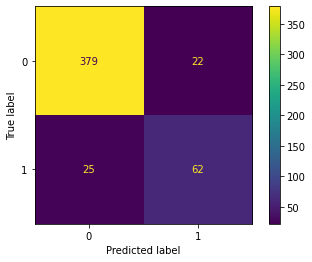

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm).plot()
plt.show()

## Accuracy of the Logistic Model

In [ ]:
from sklearn.metrics import accuracy_score
#print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Accuracy : ",accuracy_score(classifier.predict(X_test),y_test))

Accuracy :  0.9036885245901639
